# Multiple Linear Regression



Until now we were just looking at simple linear regression problems. But linear regression can also be used with more than one explanatory variable to describe the target variable.



## Learning Objectives



At the end of this notebook you should be able to
- apply multiple linear regression with scikit-learn.
- interpret multiple linear regression models.
- explain why it is better to use **adjusted $R^2$** than $R^2$ to compare multiple linear regression models.

## Recap



### The Multiple Regression Model

 

Multiple linear regression is very similar to simple linear regression except that the dependent variable $y$ is described by $k$ independent variables $x_1, \dots, x_k$  

$$ y = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_k x_k + e $$ 

The formula for our **predicted model** is given by

$$\hat{y} = b_0  + b_1  x_1 + b_2  x_2 + \dots + b_k  x_k$$

where $b_0$ is the estimated intercept and $b_1, b_2,$... are the coefficients of our features.
* **Intercept**: The interpretation stays the same as for simple linear regression. It is the value for $y$ when all $x$ are 0.
* **Coefficients**: Regarding the interpretation of the coefficients we need to be more precise: $b_i$ is the change in $y$ given a unit change in $x_i$ while **holding all other variables constant**  

## Let's start with an example



For this example we will use a car data set again. This time it will be a bit more extensive with more observations and features but our aim is still to predict `mpg` based on different car characteristics.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

In [2]:
# Import dataset 
cars = pd.read_csv("data/cars_multivariate.csv")
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Simple Linear Regression



As before, we will first use a simple linear regression model with the feature `horsepower` and see how well it fits our data. 

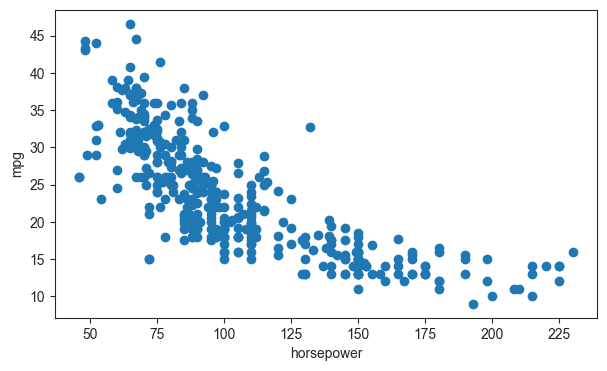

In [3]:
# Plot relationship between horsepower and mpg 
plt.scatter(cars.horsepower, cars.mpg)
plt.ylabel('mpg')
plt.xlabel('horsepower');

In [4]:
# Define feature and target variable
X = cars[['horsepower']]
y = cars['mpg']

X.shape

(392, 1)

In [5]:
# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Calculate r-squared 
y_hat = lin_reg.predict(X)
print("R-squared:", r2_score(y, y_hat).round(3))

R-squared: 0.606


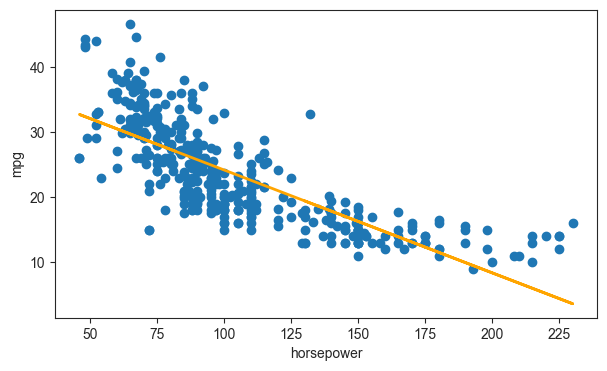

In [6]:
# Plot data with regression line
plt.scatter(X, y)
plt.plot(X, y_hat, '-', color='orange', linewidth=2)
plt.ylabel('mpg')
plt.xlabel('horsepower');

According to the $R^2$ the feature `horsepower` can explain 60.6% of the variance in our target variable. 

## Multiple Linear Regression  



Instead of using `horsepower` as the only independent variable to predict `mpg`, we might want to include other independent variables in the model to improve the fit. Let's try to add `weight` to the model.

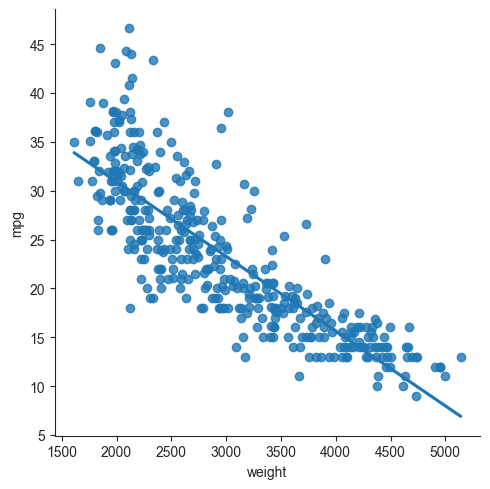

In [7]:
# Plot relationship between weight and mpg 
# We can use seaborns .lmplot function to plot our data including a regression line 
sns.lmplot(x='weight', y='mpg', data=cars, ci=None);

In [8]:
# Define model input X with two features
X2 = cars[['horsepower', 'weight']]
y2 = cars.mpg

X2.shape

(392, 2)

In [9]:
# Fit linear regression model
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y2)

# Calculate intercept and coefficient
intercept = lin_reg2.intercept_
coefficients = lin_reg2.coef_
print("Intercept:", intercept.round(4))
print("Coefficients:", coefficients.round(4))

Intercept: 45.6402
Coefficients: [-0.0473 -0.0058]


In [10]:
# Calculate r-squared 
y_hat2 = lin_reg2.predict(X2)
print("R-squared:", r2_score(y2, y_hat2).round(3))

R-squared: 0.706


### Model Interpretation



Does this Model describe the variance of `mpg` better than the simple linear regression? It seems so. This model explains about 70% of the variation in `mpg`.

Our multiple regression model is give by  

$$ \hat{mpg} = 45.6402 - 0.0473 \times horsepower - 0.0058 \times weight $$

Let's interpret what we can see here...
* The expected `mpg` for a car with a `horsepower` and `weight` of 0, is 45.6402 (in theory...).
* We would expect `mpg` to decrease by 0.0473 as `horsepower` goes up by 1,  **holding `weight` constant**.
* We would expect `mpg` to decrease by 0.0058 as `weight` increases by 1, **holding `horsepower` constant**.

### Predicting for new cars



What is the predicted `mpg` for a car with 200 `horsepower` and a `weight` of 3500?

$$ \hat{mpg} = 45.6402 - 0.0473 (200) - 0.0058 (3500) = 15.88 $$  


We would expected the `mpg` of the car to be 15.88.
This can of course also be calculated with our model. We only need to call the `.predict()`function and give it the values of X.

In [11]:
# Make predictions for new car with horsepower=200 and weight=3500
new_car = pd.DataFrame({'horsepower': [200], 'weight': [3500]})
y_prediction = lin_reg2.predict(new_car)
print("Prediction for new car:", y_prediction[0].round(3))

Prediction for new car: 15.9


### Explore Multiple Regression



Unfortunately, multiple linear regression is not so easy to display, but the use of only two independent variables predicting a dependent variable can still be displayed graphically with a 3D-plot.

Now we will try to plot the data points and our adjusted linear model on the three axes (`horsepower`, `weight` and `mpg`). With two variables instead of one independent variable, our model is not represented by a line, but by a 2D plane.

In the cell below, you will find the code for plotting this 3D plot, however, you need to define some variables first. 

The command 
```Python:
%matplotlib widget
```
will enable interactive 3D-plots, so you can change your view on the data. (When the plot is not shown after executing the cell, just run the cell again... that should fix it :) )

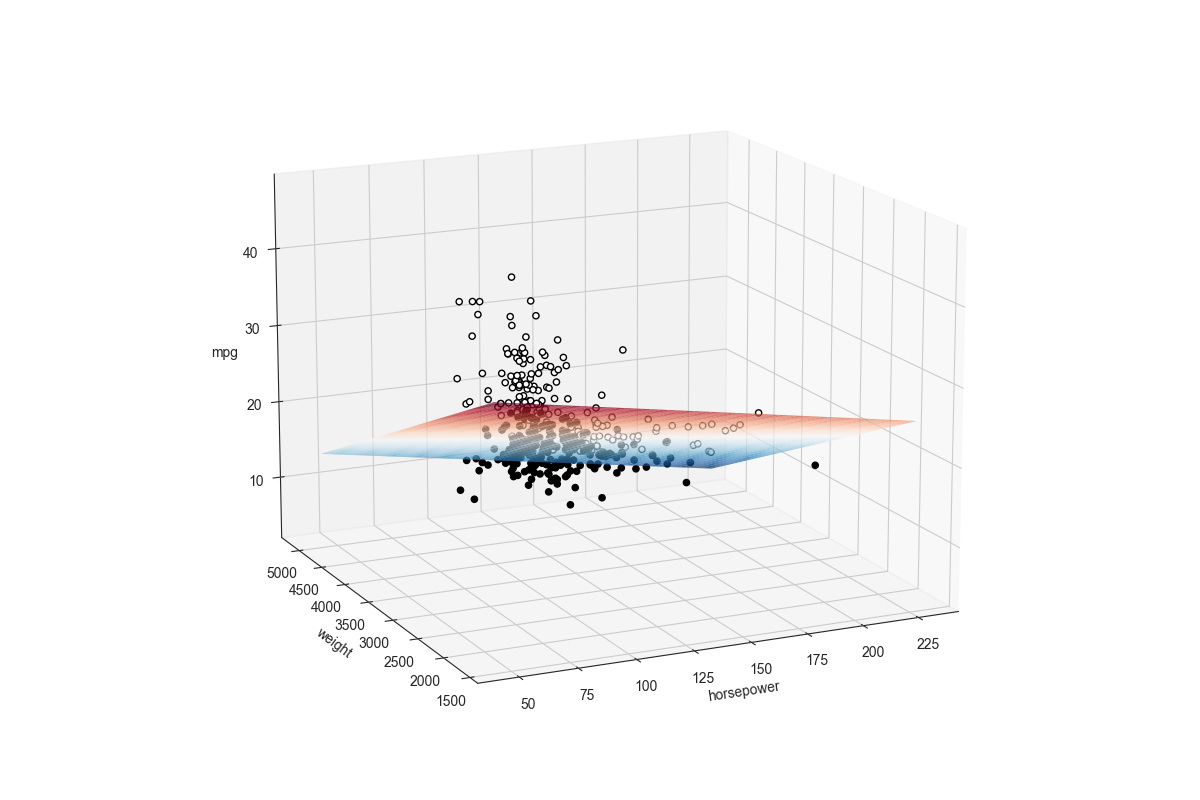

In [20]:
# We adapted this plot from https://www.datarobot.com/blog/multiple-regression-using-statsmodels/#appendix

from mpl_toolkits.mplot3d import Axes3D

# Enable interactive plot
%matplotlib widget

# You need to define some variables for the intercept and coefficients of your model
intercept = 45.6402
coef_horsepower = -0.0473
coef_weight = -0.0058

# Create horsepower/weight grid for the 3D plot
xx1, xx2 = np.meshgrid(np.linspace(X2.horsepower.min(), X2.horsepower.max(), 100), 
                       np.linspace(X2.weight.min(), X2.weight.max(), 100))

# Plot the hyperplane (HP) by evaluating the parameters on the grid
# The following line is our regression equation 
Z = intercept + coef_horsepower * xx1 + coef_weight * xx2


# Create 3D figure in matplotlib
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15, auto_add_to_figure=False)
fig.add_axes(ax)

# Plot the hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.8, linewidth=0)

# Calculate residuals
resid = y2 - y_hat2

# Plot data points - points over the HP are white, points below are black
ax.scatter(X2[resid >= 0].horsepower, X2[resid >= 0].weight, y2[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X2[resid < 0].horsepower, X2[resid < 0].weight, y2[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('horsepower')
ax.set_ylabel('weight')
ax.set_zlabel('mpg');

In order to disable the interactivity for the upcoming plots, we have to run `%matplotlib inline` again.

In [13]:
%matplotlib inline

## Adding More Variables



Now let's try to predict `mpg` using `displacement`, `horsepower`, `weight` and `acceleration`. 

In [14]:
# Print correlation of variables
cars[['displacement', 'horsepower', 'weight', 'acceleration']].corr()

,displacement,horsepower,weight,acceleration
displacement,1.000000,0.897257,0.932994,-0.543800
horsepower,0.897257,1.000000,0.864538,-0.689196
weight,0.932994,0.864538,1.000000,-0.416839
acceleration,-0.543800,-0.689196,-0.416839,1.000000


You see that there are quite some correlations between these variables! These correlations can also be seen in the scatter plots:

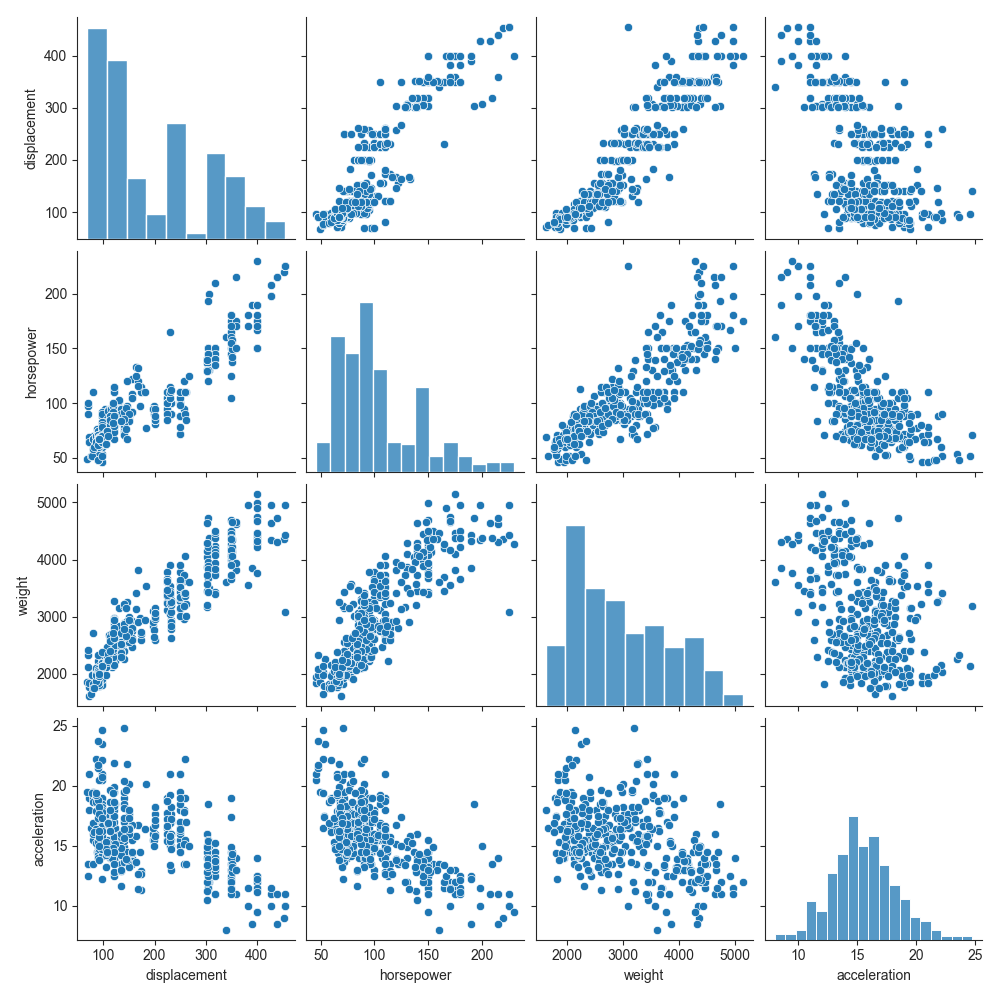

In [24]:
# Plot pair plot of potential features
sns.pairplot(cars[['displacement', 'horsepower', 'weight', 'acceleration']]);

In [21]:
# Define and fit model with multiple variables
X3 = cars[['horsepower', 'weight', 'displacement', 'acceleration']]
y3 = cars.mpg

# Fit linear regression model
lin_reg3 = LinearRegression()
lin_reg3.fit(X3, y3)

# Calculate intercept and coefficient
intercept = lin_reg3.intercept_
coefficients = lin_reg3.coef_
print("Intercept:", intercept.round(4))
print("Coefficients:", coefficients.round(4))

Intercept: 45.2511
Coefficients: [-0.0436 -0.0053 -0.006  -0.0231]


In [22]:
# Calculate r-squared 
y_hat3 = lin_reg3.predict(X3)
print("R-squared:", r2_score(y3, y_hat3).round(3))

R-squared: 0.707


You should always question your model! Here are some questions you should be able to answer now:

1. How good is the model fit?

2. What is the regression equation?

<br>

<details><summary>
Click here for the solution
</summary>
$$ \hat{mpg} = 45.2511 - 0.0436 \times horsepower - 0.0053 \times weight - 0.0060 \times displacement - 0.0231 \times acceleration $$
</details>


3. How can we interpret the model?

## $R^2$ vs. Adjusted $R^2$



Whenever we deal with multiple linear regression $R^2$ should not be the metric of your choice to evaluate the model fit. By adding new features to our model the $R^2$ will either stay the same or increase, even if those additional features don't have any relationship with our target variable. This leads to an overwhelming temptation to add more and more features into our model. However, that's not a great idea! Usually we want to train a good model, **but** we want to do it in the simplest possible way. 

This is where **adjusted $R^2$** comes to help. Adjusted $R^2$ will penalize us for adding more features that actually don't improve our existing model. For a simple linear regression $R^2$ and adjusted $R^2$ will be the nearly the same. The more non-significant features we add to a model the larger the gap between those two metrics will be. Moreover, the adjusted $R^2$ is a useful metric when we want to compare several models with different amounts of features.

The formula of the adjusted $R^2$ is:
$$R_a^2 = 1 - \frac{(1 - R^2) (n - 1)}{n - p - 1} $$  

where $n$ is the number of observations in the data set and $p$ is the number of features.

Unfortunately, scikit-learn does not provide a built-in function for calculating the adjusted $R^2$. But we can write our own function using the formula from above:

In [23]:
# Define function for calculating adjusted r-squared
def adjusted_r_squared(r_squared, X):
    adjusted_r2 = 1 - ((1 - r_squared) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

### Exercise



Calculate the adjusted $R^2$ for the three models you've trained in this notebook. Which is the best model according to this metric?

In [37]:
print("R3-squared:", round(r2_score(y3, y_hat3), 3))
print("R2-squared:", round(r2_score(y2, y_hat2), 3))
print("R-squared:", round(r2_score(y, y_hat), 3))

print("Adjusted R2 with 4 var: ",adjusted_r_squared(round(r2_score(y3, y_hat3), 3), X3))
print("Adjusted R2 with 2 var: ",adjusted_r_squared(round(r2_score(y2, y_hat2), 3), X2))
print("Adjusted R2 with 1 var: ",adjusted_r_squared(round(r2_score(y, y_hat), 3), X))

R3-squared: 0.707
R2-squared: 0.706
R-squared: 0.606
Adjusted R2 with 4 var:  0.7039715762273902
Adjusted R2 with 2 var:  0.7044884318766067
Adjusted R2 with 1 var:  0.6049897435897436


## Summary



- We extend the linear regression model to include many explanatory variables/features.
- All explanatory variables should be independent of each other.
- $R^2$ allows use to measure how good a model fits the data.
- Adjusted $R^2$ penalizes adding non-useful explanatory variables. It is useful for comparing models with different numbers of independent variables.